In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import operator
import random
train = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment2/train.json')
test = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment2/test.json')

# Number of recipes
print("Number of recipes : ",len(train))

# Number of cuisines
cuisines = train.cuisine.unique()

print("Number of cuisines : ", len(cuisines))

#Get total number of ingredients from dataset
total_ingre = []
for lst in train['ingredients']:
  total_ingre.extend(lst)
print(len(total_ingre))

#Initialising Nature Basket
nb=list(set(total_ingre))
print(len(nb))
print(type(nb))
nb = random.sample(nb,5000)
print(nb)
print(len(nb))

#Initialising Kitchen Basket
kb = random.sample(nb,50)
print(kb)
print("kb type ", type(kb))
print(len(kb))
recipe_prim = {}
# number of ingr per recipe - fixed.
recipe_size =10
# generations
epochs = 5
curr_epoch = 0

#initial recipes of the cuisine
number_of_recipes =500
#number of ingr to be mutated

#ratio between the sizes of pool of ingredients and the pool of recipes
m = 10

#Assigning fitness values to ingredients 
fitness_values = {}
for ing in nb:
  # print(ing)
  fitness_values[ing] = random.randint(0,99)
i =0
while i < number_of_recipes:
  recipe_prim['recipe'+str(i+1)] = random.sample(kb, recipe_size)
  i = i+1
print(len(recipe_prim))

Number of recipes :  39774
Number of cuisines :  20
428275
6714
<class 'list'>
['fresh prawn', 'habanero hot sauce', 'tart', 'fresh chile', 'brown rice noodles', 'cinnamon sugar', 'chinese mustard', 'breadcrumb mix', 'spanish onion', 'alfalfa sprouts', 'balsamic vinaigrette', 'mild salsa', 'fat-trimmed beef flank steak', 'instant white rice', 'navy beans', 'coconut juice', 'rooster', 'ground beef', 'pickapeppa sauce', 'roti', 'vegetable seasoning', 'sorghum syrup', 'egg whites', 'rennet', 'low-fat sour cream', 'mild green chiles', 'pork spareribs', 'Kraft Grated Parmesan Cheese', 'aonori', 'crema', 'refrigerated seamless crescent dough', 'instant espresso powder', 'pita loaves', 'Lea & Perrins Worcestershire Sauce', 'chocolate ice cream mix', 'herb vinegar', 'saffron', 'tomato soup', 'sweet potato starch', 'marmite', 'topside steak', 'dhaniya powder', 'Alexia Waffle Fries', 'lo mein noodles', 'low sodium garbanzo beans', 'sauce', 'Splenda Brown Sugar Blend', 'Bisquick Baking Mix', 'pla

Epoch  1  Started

Recipe Size : 10
Kitchen Basket : 50
Nature Basket :  5000
Number of recipe in primordial cuisine epoch 1 = 500


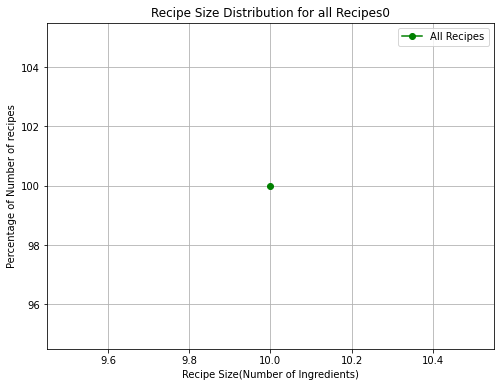

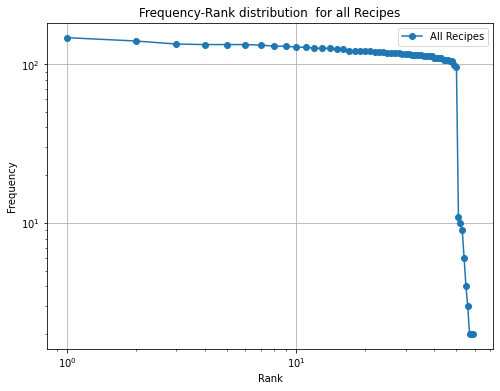

Epoch  1  Ended

Recipe Length : 600
Kitchen Basket : 60
New Kitchen Basket :  60
Nature Basket :  4990


Epoch  2  Started

Recipe Size : 10
Kitchen Basket : 60
Nature Basket :  4990
Number of recipe in primordial cuisine epoch 2 = 600


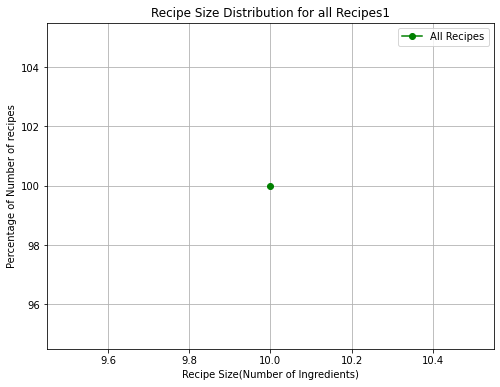

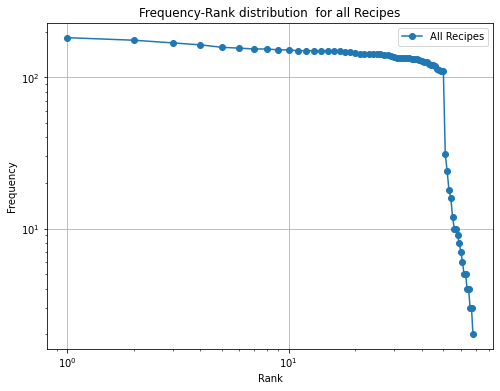

Epoch  2  Ended

Recipe Length : 720
Kitchen Basket : 72
New Kitchen Basket :  72
Nature Basket :  4978


Epoch  3  Started

Recipe Size : 10
Kitchen Basket : 72
Nature Basket :  4978
Number of recipe in primordial cuisine epoch 3 = 720


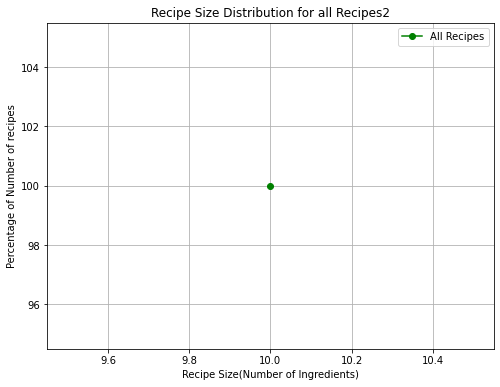

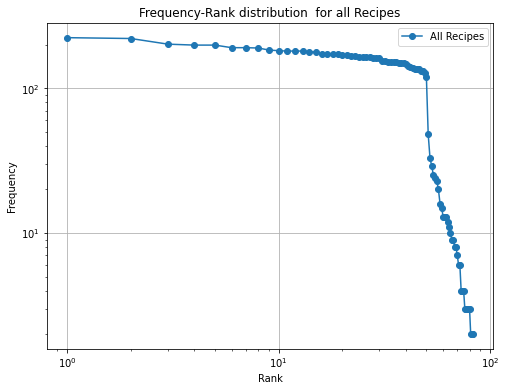

Epoch  3  Ended

Recipe Length : 864
Kitchen Basket : 86
New Kitchen Basket :  86
Nature Basket :  4964


Epoch  4  Started

Recipe Size : 10
Kitchen Basket : 86
Nature Basket :  4964
Number of recipe in primordial cuisine epoch 4 = 864


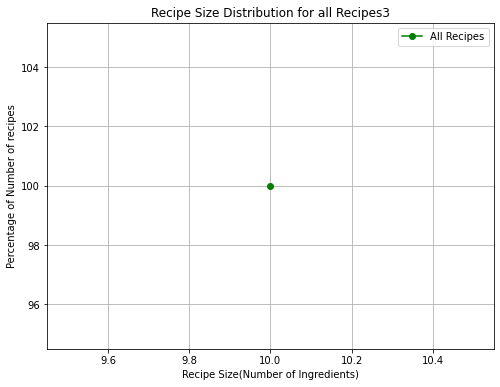

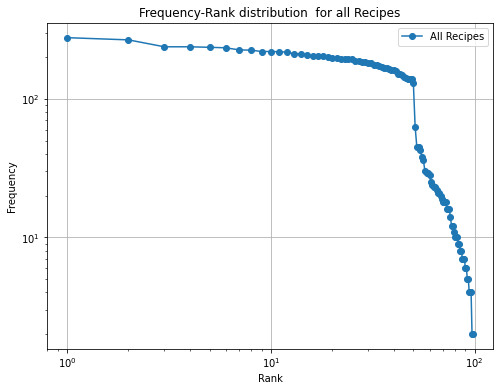

Epoch  4  Ended

Recipe Length : 1037
Kitchen Basket : 104
New Kitchen Basket :  104
Nature Basket :  4946


Epoch  5  Started

Recipe Size : 10
Kitchen Basket : 104
Nature Basket :  4946
Number of recipe in primordial cuisine epoch 5 = 1037


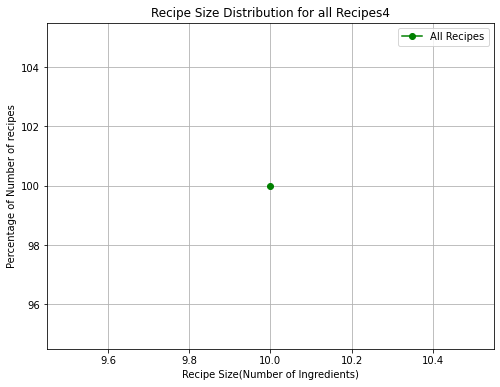

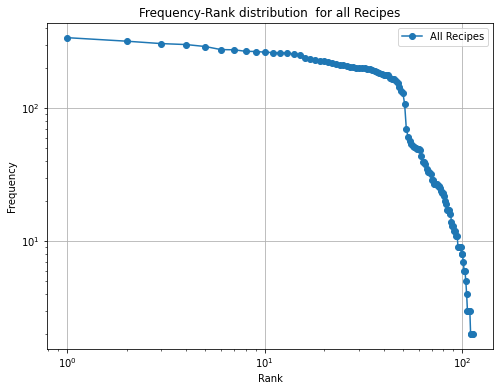

Epoch  5  Ended

Recipe Length : 1244
Kitchen Basket : 124
New Kitchen Basket :  124
Nature Basket :  4926




In [2]:
n =501
while(curr_epoch != epochs):

  print("Epoch ",curr_epoch + 1 , " Started\n")
  print("Recipe Size :",recipe_size)
  print("Kitchen Basket :",len(kb))
  print("Nature Basket : ",len(nb))
  print("Number of recipe in primordial cuisine epoch", curr_epoch + 1, "=", len(recipe_prim))
  number_of_recipes = len(recipe_prim)
  Recipes_Per_Epochs = round((number_of_recipes)/epochs)
  number_of_recipes_new = number_of_recipes + Recipes_Per_Epochs
  kb_new_size = round(number_of_recipes_new/m)
  while(len(kb) != kb_new_size):
    random_i = random.randint(0, len(nb)-1)
    kb.append(nb.pop(random_i))
  while(len(recipe_prim) != number_of_recipes_new ):
    while 1:
      recipe_index = random.randint(1,len(recipe_prim)-1)
      ing_index = random.randint(0,recipe_size-1)
      random_recipe = recipe_prim['recipe'+str(recipe_index)]      
      #Selecting random ingredient from the selected random recipe
      random_ing = recipe_prim['recipe'+str(recipe_index)][ing_index]   
      j = random.randint(0,kb_new_size-1)
      if(kb[j] not in random_ing ):
        if(fitness_values[kb[j]] > fitness_values[random_ing]):
          random_recipe.remove(random_ing)         
          random_recipe.append(kb[j])
          random_recipe.sort()
          recipe_prim['recipe'+str(n)] = random_recipe 
          n = n+1
          break
        if(len(recipe_prim)/len(kb) == 10):
            break

  ##############################################################################
  # Plot for Recipe Size Distribution
  count =[]
  for lst in recipe_prim.keys():
    count.append(len(recipe_prim[lst]))

  recipe_size_data = {}
  for p in count:
    # print(type(p))
    if p not in recipe_size_data:
        recipe_size_data[p] = 1
    else:
        recipe_size_data[p] += 1
            
  for p in recipe_size_data.keys():
      recipe_size_data[p] = recipe_size_data[p]/len(count) * 100

  plt.figure(figsize = (8,6))
  plt.plot(list(recipe_size_data.keys()),list(recipe_size_data.values()), marker = 'o' , label = "All Recipes", c ='green')
  plt.ylabel("Percentage of Number of recipes")
  plt.xlabel("Recipe Size(Number of Ingredients)")
  plt.title('Recipe Size Distribution for all Recipes'+ str(curr_epoch) )
  plt.legend()
  plt.grid()
  plt.show()
  print("\n")

  ##############################################################################
  # Plot for Frequency Rank Distribution

  total_ingre =[]
  for lst in recipe_prim.keys():
    for lst_ingr in recipe_prim[lst]:
    # total_ingre.extend(lst)
      total_ingre.append(lst_ingr)

  values, counts = np.unique(total_ingre, return_counts=True)
  # print(type(counts))
  # print(values, counts)
  sorted_count = np.sort(counts)[::-1]
  rank =1
  rank_lst = []
  for i in range(sorted_count.shape[0]):
    rank_lst.append(rank)
    rank = rank+1

  plt.figure(figsize = (8,6))
  plt.loglog(rank_lst,sorted_count, marker = 'o',label ="All Recipes" )
  plt.ylabel("Frequency")
  plt.xlabel("Rank")
  plt.title('Frequency-Rank distribution  for all Recipes')
  plt.legend()
  plt.grid()
  plt.show()

  print("Epoch ",curr_epoch + 1, " Ended\n")
  print("Recipe Length :",len(recipe_prim))
  print("Kitchen Basket :",len(kb))
  print("New Kitchen Basket : ",(kb_new_size))
  print("Nature Basket : ",len(nb))
  print("\n")
  if ((kb_new_size) == 0):
        break
  curr_epoch = curr_epoch + 1

       

Time taken to run the code: O(size of kitchen basket)
Mutate operation : O(n), where n is the size of primordial cuisine.
Time complexity of entire algorithm - O(number of epochs * tc(Mutate operation) )
<br>Analysis - The recipe size distribution remains constant. The frequency rank follows delta function.



In [3]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q1.ipynb to html
[NbConvertApp] Writing 614378 bytes to /content/drive/MyDrive/SEM3/CGAS/Assignment2/CGAS_A2_Q1.html


In [4]:
# nb_new=[]
# for i in nb:
#   if i not in kb:
#     nb_new.append(i)
# # nb_new = [i for i in nb if i not in kb]
# print(nb_new)
# print(len(nb_new))